# ソローモデル

[蓮見 (2020)](https://www.nippyo.co.jp/shop/book/8267.html) §1.1 と §1.3 を元にしています。

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import japanize_matplotlib

sp.init_printing()

## §1.1 ソローモデル

### 効率労働あたり資本のダイナミクス

式 (1.9)

$$
\begin{aligned}
k_{t+1} &= G(k_{t})\\
        &= \frac{(1 - \delta) k_t + sk_t^\alpha}{(1 + g)(1 + n)}
\end{aligned}
$$

$k_{t+1}$ は `ka` で表す。"after" という気持ち。（[加藤『現代マクロ経済学講義』](https://str.toyokeizai.net/books/9784492313701/) の記法を参考にした）

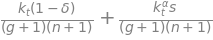

In [2]:
ka, kt = sp.symbols("k_{t+1}, k_{t}")
delta, g, n, s, alpha = sp.symbols("delta, g, n, s, alpha")

G = sp.Lambda(kt, ((1 - delta) * kt / (1 + g) / (1 + n) 
                   + s * kt**alpha / (1 + g) / (1 + n)))
G(kt)

### 定常状態 $k^*$

このノートでは $gn$ を無視していないのでテキストとは結果が少し異なる。

In [3]:
ks = sp.solve(kt - G(kt), kt)[0]
ks

### シミュレーション

図1.4 (p. 11) を再現する。

In [4]:
params = {
    alpha: 0.30,
    s: 0.2,
    delta: 0.1,
    g: 0.02,
    n: -0.01
}

In [5]:
kstar = ks.subs(params)
kstar

上記 $G$ を Numpy の関数に変換する。

In [6]:
F = sp.lambdify(kt, G(kt).subs(params))

### $k_0 = k^* / 2$ 

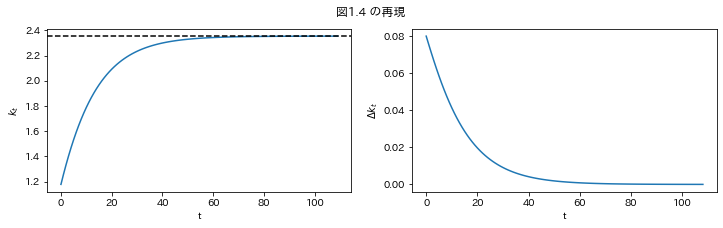

In [7]:
T = 110
k = np.empty(T)
k[0] = kstar / 2

for t in range(T - 1):
    k[t + 1] = F(k[t])

# Plot 
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle("図1.4 の再現")

axes[0].plot(k)
axes[0].axhline(y=kstar, linestyle="dashed", color="black")
axes[0].set_xlabel("t")
axes[0].set_ylabel("$k_t$");

axes[1].plot(np.diff(k))
axes[1].set_xlabel("t")
axes[1].set_ylabel("$\Delta k_t$")
     
plt.show()

### $k_0 = 2 k^*$ 

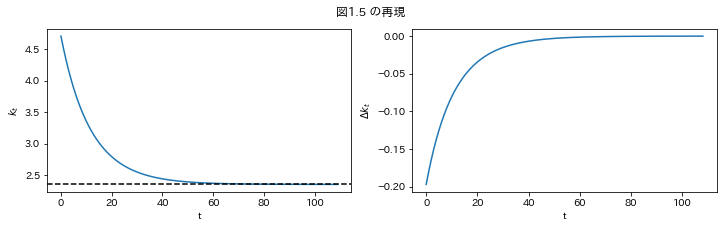

In [8]:
T = 110
k = np.empty(T)
k[0] = 2 * kstar

for t in range(T - 1):
    k[t + 1] = F(k[t])


# Plot 
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle("図1.5 の再現")

axes[0].plot(k)
axes[0].axhline(y=kstar, linestyle="dashed", color="black")
axes[0].set_xlabel("t")
axes[0].set_ylabel("$k_t$");

axes[1].plot(np.diff(k))
axes[1].set_xlabel("t")
axes[1].set_ylabel("$\Delta k_t$")
     
plt.show()

## §1.3 貯蓄率と消費の関係

消費は次のように書ける。

In [9]:
c = (1 - s) * kt**alpha
c

定常状態における消費

In [10]:
cs = c.subs({kt: ks})
cs

定常状態の消費を最大にする貯蓄率を求める。
要するに微分してゼロとした方程式を解くのだけど，
必要な条件を設定していないので `check=False` として解けない部分は無視する。

In [11]:
sG = sp.solve(cs.diff(s), s, check=False)[0]
sG

要するに Cobb-Douglas の場合，資本分配率がちょうど黄金率の貯蓄率になっているという話。

### ケース A: $s < \alpha$ から $s = \alpha$ に変化

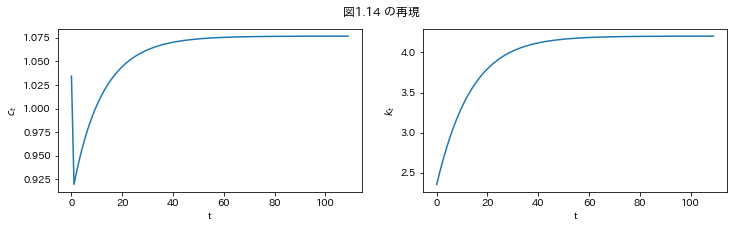

In [12]:
T = 110
kA, cA = np.empty(T), np.empty(T)
kA[0] = kstar
cA[0] = (1 - params[s]) * kA[0]**params[alpha]

paramsA = params.copy()
paramsA.update({s: paramsA[alpha]})

FA = sp.lambdify(kt, G(kt).subs(paramsA))

for t in range(T - 1):
    kA[t + 1] = FA(kA[t])

cA[1:] = (1 - paramsA[s]) * kA[1:]**paramsA[alpha]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle("図1.14 の再現")

axes[0].plot(cA)
axes[0].set_xlabel("t")
axes[0].set_ylabel("$c_t$")

axes[1].plot(kA)
axes[1].set_xlabel("t")
axes[1].set_ylabel("$k_t$")

plt.show()

### ケース B: $s = \alpha$ から $s > \alpha$ に変化

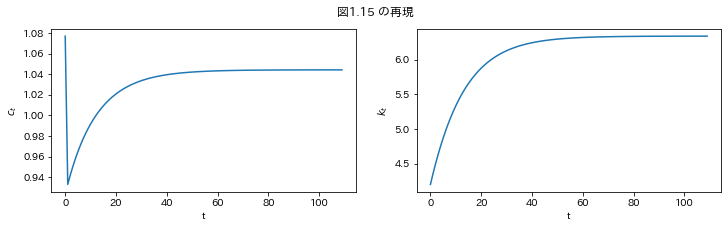

In [13]:
T = 110
kB, cB = np.empty(T), np.empty(T)
kB[0] = ks.subs(paramsA)
cB[0] = (1 - paramsA[s]) * kB[0]**paramsA[alpha]

paramsB = params.copy()
paramsB.update({s: 0.4})

FB = sp.lambdify(kt, G(kt).subs(paramsB))

for t in range(T - 1):
    kB[t + 1] = FB(kB[t])

cB[1:] = (1 - paramsB[s]) * kB[1:]**paramsB[alpha]
    
# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle("図1.15 の再現")

axes[0].plot(cB)
axes[0].set_xlabel("t")
axes[0].set_ylabel("$c_t$")

axes[1].plot(kB)
axes[1].set_xlabel("t")
axes[1].set_ylabel("$k_t$")

plt.show()

### ケース C: $s > \alpha$ から $s = \alpha$ に変化

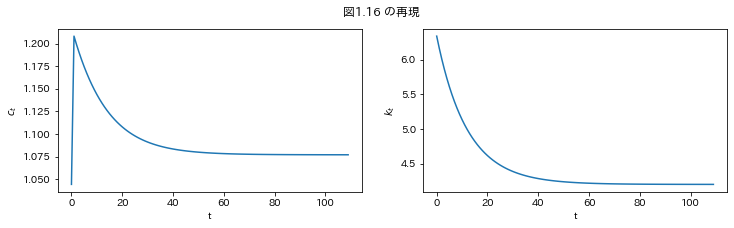

In [14]:
T = 110
kC, cC = np.empty(T), np.empty(T)
kC[0] = ks.subs(paramsB)
cC[0] = (1 - paramsB[s]) * kC[0]**paramsB[alpha]

paramsC = paramsA.copy()
FC = sp.lambdify(kt, G(kt).subs(paramsC))

for t in range(T - 1):
    kC[t + 1] = FC(kC[t])

cC[1:] = (1 - paramsC[s]) * kC[1:]**paramsC[alpha]
   
# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle("図1.16 の再現")

axes[0].plot(cC)
axes[0].set_xlabel("t")
axes[0].set_ylabel("$c_t$")

axes[1].plot(kC)
axes[1].set_xlabel("t")
axes[1].set_ylabel("$k_t$")

plt.show()